# Text Clustering

## Import Dataset

Importing the text file to a pandas dataframe by considering it to be a csv seperated by "::"(since each sentence should be a row in the dataframe and the sentences might have "," so a character which is most unlikely to occur is used as a csv delimiter)

In [1]:
import pandas as pd

df = pd.read_csv('./text_to_cluster.txt', sep='::', header=None)
df

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,0
0,Ransomware attack at Mexico's Pemex halts work...
1,#city | #ransomware | Ransomware Attack At Mex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ..."
3,A Mexican oil company was hit by ransomware at...
4,Pemex Struck by Ransomware Attack
...,...
679,Detecting and Responding to Ransomware
680,"Emotet malware is back, more dangerous than ever"
681,Hosting provider SmarterASP.NET hit by ransomw...
682,Ransomware as a Service (RaaS) – A Contemporar...


In [2]:
document = list(df[0].values)
document

["Ransomware attack at Mexico's Pemex halts work, threatens to cripple computers",
 '#city | #ransomware | Ransomware Attack At Mexico’s Pemex Halts Work, Threatens To Cripple Computers',
 "Mexico's Pemex Oil Suffers Ransomware Attack, $4.9 Million Demanded",
 'A Mexican oil company was hit by ransomware attack',
 'Pemex Struck by Ransomware Attack',
 'Mexico’s Pemex Said It Quickly Neutralized Digital Attack',
 'Ransomware attack hits Mexican state oil firm Pemex',
 'Ransomware Attack at Mexican State Oil Firm Halts Work, Threatens to Cripple Computers – GetAps.site',
 'Mexican state oil firm Pemex hit by ransomware attack',
 'Ransomware attack on the Mexican oil giant Pemex',
 "Ransomware attack at Mexico's Pemex halts work, threatens to cripple computers By Reuters",
 "Ransomware Attack Hits Mexico's State Oil Firm Pemex",
 'Spain’s Largest Radio Station Under Siege By Bitcoin Ransomware Attack',
 'Ransomware Attack Hits Web Hosting Provider SmarterASP',
 'ASP.NET hosting provider r

In [3]:
len(document)

684

## Preprocessing

### Cleaning Text

**1. Remove characters that are not alphabets**  
        Regex is used to filter the characters that are alphabets.
  
  
**2. Remove Stopwords**  
        Remove all stopword as they donot contribute to our analysis.  
  
  
**3. Stem words**  
        Reduce words to their root value.  
        *Another alternative to this is to lemmatize the words but it takes more time than stemming.*

In [4]:
from nltk import PorterStemmer
import nltk
from nltk.corpus import stopwords
import re

# Function to clean text
def cleanText(data):
    
    # Filter alphabets
    text = re.sub('[^a-zA-Z]', ' ', data)
    # Lowercase and tokenize words
    words = nltk.word_tokenize(text.lower())
    stops = set(stopwords.words('english'))
    # Stem words and remove stpwords
    stemmer = PorterStemmer()
    lem_words = [stemmer.stem(w) for w in words if w not in stops]
    return ' '.join(lem_words)

In [5]:
X_clean = []
for i in range(len(document)):
    X_clean.append(cleanText(document[i]))
X_clean

['ransomwar attack mexico pemex halt work threaten crippl comput',
 'citi ransomwar ransomwar attack mexico pemex halt work threaten crippl comput',
 'mexico pemex oil suffer ransomwar attack million demand',
 'mexican oil compani hit ransomwar attack',
 'pemex struck ransomwar attack',
 'mexico pemex said quickli neutral digit attack',
 'ransomwar attack hit mexican state oil firm pemex',
 'ransomwar attack mexican state oil firm halt work threaten crippl comput getap site',
 'mexican state oil firm pemex hit ransomwar attack',
 'ransomwar attack mexican oil giant pemex',
 'ransomwar attack mexico pemex halt work threaten crippl comput reuter',
 'ransomwar attack hit mexico state oil firm pemex',
 'spain largest radio station sieg bitcoin ransomwar attack',
 'ransomwar attack hit web host provid smarterasp',
 'asp net host provid recov ransomwar attack',
 'host provid smarterasp net recov ransomwar attack',
 'smarterasp net host network crippl ransomwar attack',
 'ransomwar attack dow

### Visualizing the Word Cloud of the data

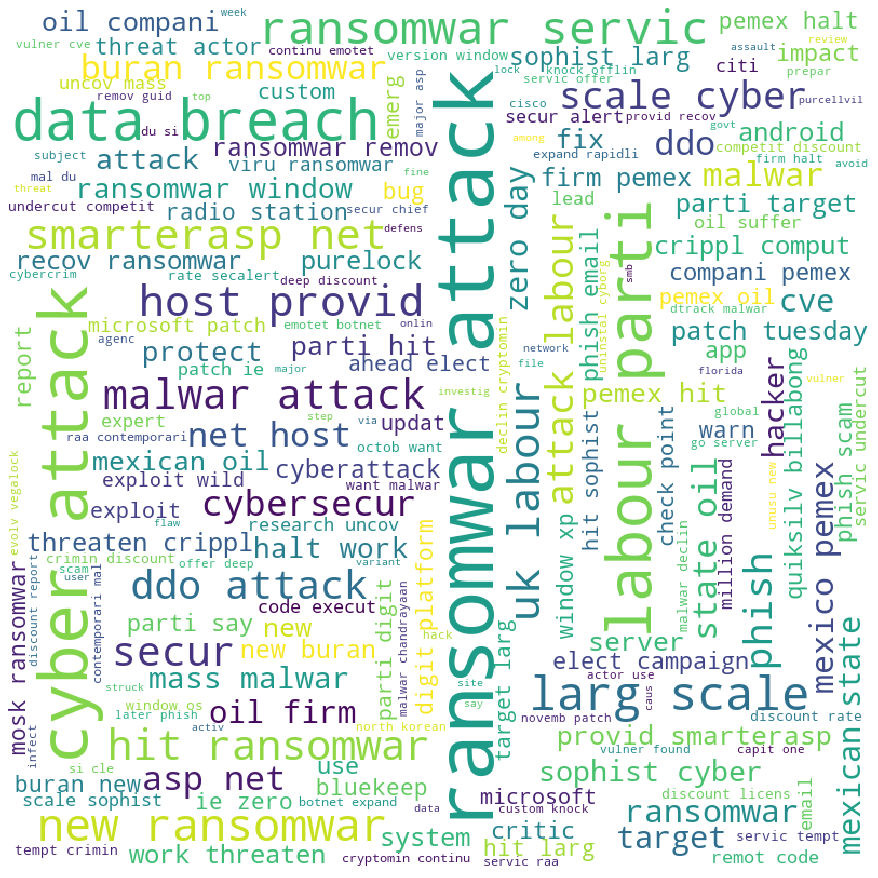

In [6]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white').generate(' '.join(X_clean)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Vectorizing the corpus

Tf-Idf Vectorizer is used to vectorize the corpora to pass it through the clustering the model.  
TfidfVectorizer is used over CountVectorizer as Countvectorizer simply computes the frequency of the token in the document but Tfidf calculates the term frequency and also also how recurrent that term is in the entire corpora which is more helpful in determining the imporatnce of the token in the corpora.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_clean)
# get list of features vectorized by the vectorizer
features = vectorizer.get_feature_names()
print("No. of features = ", len(features))

No. of features =  831


### Dendogram of the data

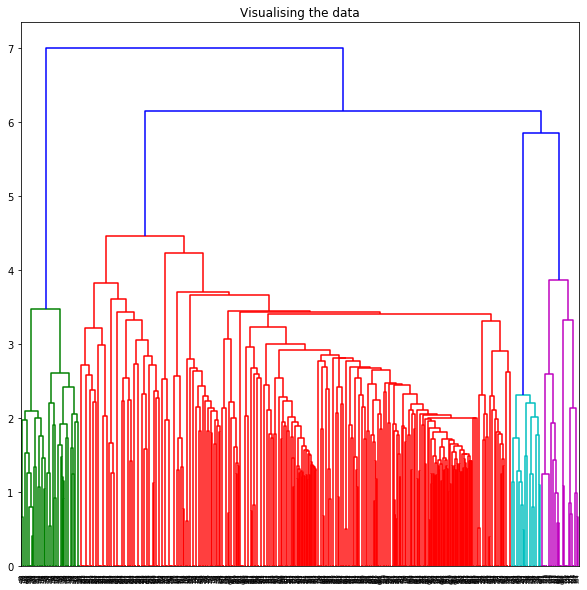

In [8]:
import scipy.cluster.hierarchy as shc 

plt.figure(figsize =(10, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X.toarray(), method ='ward'))) 

From the above dendogram, we can intuitively say that the minimum number of clusters would be 5.

## Clustering

### Kmeans Elbow Method
  
Elbow method is used to determine the optimal number of clusters. Two measures are used -  
1. **Inertia** - Sum of squared distances of samples to their closest cluster center.  
2. **Distortion** - Average of the squared distances from the cluster centers of the respective clusters.

In [9]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from kneed import KneeLocator
import math

# calculate the maximum number of clusters using a general formula
max_cluster = round(math.sqrt(len(df)/2))

sse = {}
distortions = {}

for k in range(5, max_cluster):
    kmeans = KMeans(n_clusters=k).fit(X)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    distortions[k] = sum(np.min(cdist(X.toarray(), kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

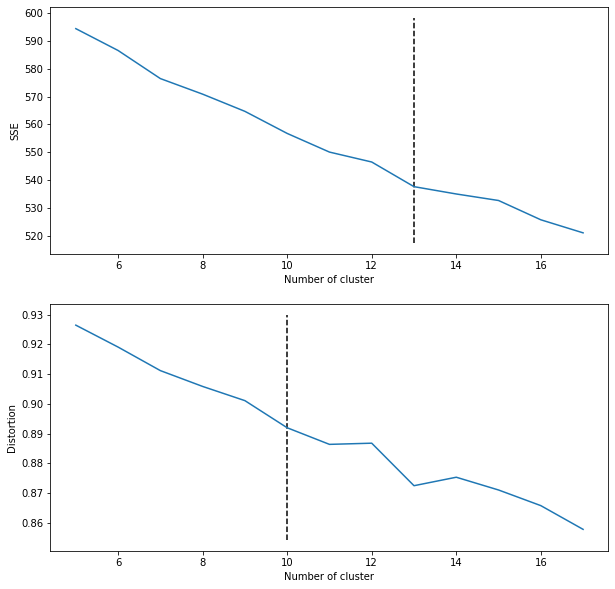

In [10]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# Find the elbow in the inertia graph
sse_kn = KneeLocator(list(sse.keys()), list(sse.values()), curve='convex', direction='decreasing')
plt.vlines(sse_kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.subplot(2, 1, 2)
plt.plot(list(distortions.keys()), list(distortions.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Distortion")
# Find the elbow in the distortion graph
dis_kn = KneeLocator(list(distortions.keys()), list(distortions.values()), curve='convex', direction='decreasing')
plt.vlines(dis_kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.show()

### Calculation of Silhouette Score

Since we have two knee values from each of the graph, the silhoutte score is calculated to evaluate the clusters. The value of k for which the silhoutte score is more is taken for final clustering.

In [11]:
from sklearn.metrics import silhouette_score

score = {}
for k in [sse_kn.knee, dis_kn.knee]:
    try:
        model = KMeans(n_clusters=k)
        clusters = model.fit_predict(X)
        score[k] = silhouette_score(X.toarray(), clusters, metric='euclidean')
        print(k, '-> ', score[k])
    except Exception as e:
        print('Value of k has not been able to calculated graphically')

try:
    opt_score = max(score.values())
    k = list(score.keys())[list(score.values()).index(opt_score)]
except Exception as e:
    print('Values of k is not been able to calculated by the graphs, so default k = 13 is chosen')
    k=15

print('Optimal k is : ', k)

13 ->  0.08723244574228074
10 ->  0.08177535249084775
Optimal k is :  13


### Clustering using K-means clustering algorithm

On evaluation, the kmeans seems to give the best clusters. Hence, K-means is used for clustering over density based and hierarchical clustering.

In [12]:
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters
df = df.sort_values('cluster')
df

,0,cluster
223,Boardriders and its subsidiarities QuikSilver ...,0
220,#city | #ransomware | 90pc of UK’s biggest law...,0
217,Detecting and Responding to Ransomware,0
549,Australian Govt agency ACSC warns of Emotet an...,0
214,#city | #ransomware | MIT Expert Explains Rans...,0
...,...,...
187,#city | #ransomware | Ransomware Attack At Mex...,12
189,"Mexico's Pemex Oil Suffers Ransomware Attack, ...",12
190,"Mexico’s Pemex Oil Suffers Ransomware Attack, ...",12
10,Ransomware attack at Mexico's Pemex halts work...,12


## Saving the Output to a file

In [13]:
with open('output.txt', 'w+') as file:
    for i in range(max(clusters)+1):
        file.write(f'cluster id: {i}\n')
        file.write('\n'.join(list(df[df['cluster']==i][0])))
        file.write('\n' + '*'*100 + '\n')